In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Normality tests
from scipy.stats import normaltest as dagostino_test # D'Agostino test
from scipy.stats import anderson as and_dar_test # Anderson-Darling Test
from scipy.stats import kstest as kol_smi_test # Kolmogorov-Smirnov Test
from scipy.stats import shapiro as shap_wil_test # Shapiro-Wilk Test
from scipy.stats import jarque_bera as jarque_bera_test # Jarque-Bera Test

# ANOVA
from scipy.stats import f_oneway # Parametric
from scipy.stats import kruskal # Non-Parametric

# Statistical Test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scikit_posthocs import posthoc_dunn

from scipy.stats import gamma
from fitter import Fitter

In [2]:
data = pd.read_csv('D:/thesis_data/VEG_INDICES/samples/stratified/florestal/FF_20170112_patches.csv')

In [3]:
data

,dprvi_patch_0,prvi_patch_0,dpsvi_patch_0,dpsvim_patch_0,rvi_patch_0,dprvi_patch_1,prvi_patch_1,dpsvi_patch_1,dpsvim_patch_1,rvi_patch_1,...,dprvi_patch_20,prvi_patch_20,dpsvi_patch_20,dpsvim_patch_20,rvi_patch_20,dprvi_patch_21,prvi_patch_21,dpsvi_patch_21,dpsvim_patch_21,rvi_patch_21
0,0.595809,0.005838,0.051846,0.013346,0.902585,0.405169,0.003969,0.048332,0.015080,0.826355,...,0.361757,0.002856,0.041963,0.005662,1.030302,0.494938,0.004453,0.048357,0.007576,1.030983
1,0.644798,0.007179,0.050485,0.015386,0.846298,0.332395,0.002445,0.038630,0.013450,0.731284,...,0.356512,0.003085,0.038966,0.006850,0.923030,0.501876,0.004876,0.055909,0.008026,1.110338
2,0.622913,0.007168,0.049857,0.020152,0.767389,0.296684,0.001763,0.034907,0.020730,0.581763,...,0.477290,0.004860,0.037416,0.012322,0.736255,0.559531,0.007149,0.056568,0.007649,1.134574
3,0.636728,0.007540,0.047255,0.026870,0.669795,0.354874,0.002004,0.027740,0.019722,0.493428,...,0.390049,0.003595,0.035343,0.022541,0.570129,0.580443,0.008415,0.051736,0.012420,0.922306
4,0.670117,0.008361,0.044005,0.034552,0.582163,0.397045,0.002248,0.026702,0.012380,0.568607,...,0.258053,0.001901,0.031273,0.033615,0.447444,0.654845,0.009615,0.065469,0.022508,0.895288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.398495,0.003779,0.051241,0.025687,0.721943,0.383286,0.005043,0.043378,0.035166,0.572237,...,0.576395,0.007415,0.060030,0.011141,1.051590,0.443139,0.003640,0.041826,0.024938,0.626688
896,0.476509,0.005077,0.056939,0.014697,0.932315,0.413625,0.004779,0.047754,0.028504,0.661698,...,0.575161,0.007411,0.073512,0.018660,1.023522,0.412240,0.002646,0.046640,0.034021,0.612035
897,0.489911,0.004655,0.042328,0.008917,0.895891,0.414325,0.004294,0.039864,0.020484,0.646999,...,0.599345,0.009241,0.094716,0.027348,1.072395,0.334861,0.001934,0.045762,0.031033,0.622452
898,0.522375,0.005445,0.040425,0.008884,0.869047,0.412019,0.004055,0.044014,0.023990,0.660132,...,0.573182,0.008914,0.069405,0.026513,0.884786,0.328172,0.001933,0.040423,0.018098,0.682556


In [4]:
data_p = data['dprvi_patch_0']
data_q = data['dprvi_patch_2']

,sumsquare_error,aic,bic,kl_div
gamma,38.551761,101.207272,-2814.946508,inf


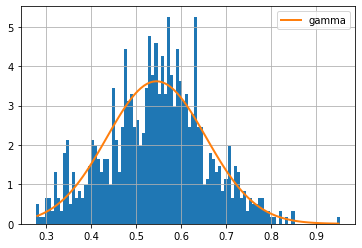

In [5]:
f = Fitter(data_p, distributions=['gamma'])
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()

In [6]:
f.get_best()

{'gamma': {'a': 60907.1448746259,
  'loc': -26.694026243913058,
  'scale': 0.00044722261795549856}}

In [8]:
[a_p, loc_p, scale_p] = gamma.fit(data_p)
[a_q, loc_q, scale_q] = gamma.fit(data_q)

In [9]:
scale_p

0.00044722261795549856

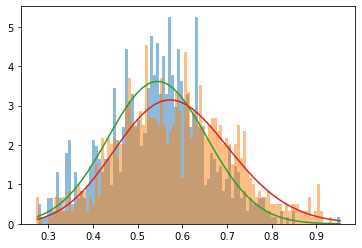

In [11]:
x = np.linspace(np.min(data_p), np.max(data_p))

plt.hist(data_p, bins=100, density=True, alpha=0.5)
plt.hist(data_q, bins=100, density=True, alpha=0.5)

plt.plot(x, gamma.pdf(x, a_p, loc_p, scale_p))
plt.plot(x, gamma.pdf(x, a_q, loc_q, scale_q))

In [13]:
from scipy.stats import chi2
from scipy.special import psi
from math import log

In [14]:
kp = a_p
kq = a_q
thetap = scale_p
thetaq = scale_q

dskl = ((kp - kq) * (psi(kp) + log(thetap) - psi(kq) - log(thetaq)) + ((kp*thetap - kq*thetaq) * ((thetap - thetaq) / (thetap * thetaq)))) / 2

m = data_p.count()
n = data_q.count()

s = ((2*m*n) / (m + n)) * dskl
 
p_value = chi2.sf(s, df=2)

if p_value <= 0.05:
    print('Reject H0')

Reject H0


In [18]:
m

900

In [15]:
dskl

66966.57945234918

In [16]:
p_value

0.0

In [17]:
s

60269921.50711426

In [2]:
import geopandas as gpd
import pandas as pd

In [4]:
test

,dprvi_patch_0,prvi_patch_0,dpsvi_patch_0,dpsvim_patch_0,rvi_patch_0,dprvi_patch_1,prvi_patch_1,dpsvi_patch_1,dpsvim_patch_1,rvi_patch_1,...,dprvi_patch_20,prvi_patch_20,dpsvi_patch_20,dpsvim_patch_20,rvi_patch_20,dprvi_patch_21,prvi_patch_21,dpsvi_patch_21,dpsvim_patch_21,rvi_patch_21
0,0.595809,0.005838,0.051846,0.013346,0.902585,0.405169,0.003969,0.048332,0.015080,0.826355,...,0.361757,0.002856,0.041963,0.005662,1.030302,0.494938,0.004453,0.048357,0.007576,1.030983
1,0.644798,0.007179,0.050485,0.015386,0.846298,0.332395,0.002445,0.038630,0.013450,0.731284,...,0.356512,0.003085,0.038966,0.006850,0.923030,0.501876,0.004876,0.055909,0.008026,1.110338
2,0.622913,0.007168,0.049857,0.020152,0.767389,0.296684,0.001763,0.034907,0.020730,0.581763,...,0.477290,0.004860,0.037416,0.012322,0.736255,0.559531,0.007149,0.056568,0.007649,1.134574
3,0.636728,0.007540,0.047255,0.026870,0.669795,0.354874,0.002004,0.027740,0.019722,0.493428,...,0.390049,0.003595,0.035343,0.022541,0.570129,0.580443,0.008415,0.051736,0.012420,0.922306
4,0.670117,0.008361,0.044005,0.034552,0.582163,0.397045,0.002248,0.026702,0.012380,0.568607,...,0.258053,0.001901,0.031273,0.033615,0.447444,0.654845,0.009615,0.065469,0.022508,0.895288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.398495,0.003779,0.051241,0.025687,0.721943,0.383286,0.005043,0.043378,0.035166,0.572237,...,0.576395,0.007415,0.060030,0.011141,1.051590,0.443139,0.003640,0.041826,0.024938,0.626688
896,0.476509,0.005077,0.056939,0.014697,0.932315,0.413625,0.004779,0.047754,0.028504,0.661698,...,0.575161,0.007411,0.073512,0.018660,1.023522,0.412240,0.002646,0.046640,0.034021,0.612035
897,0.489911,0.004655,0.042328,0.008917,0.895891,0.414325,0.004294,0.039864,0.020484,0.646999,...,0.599345,0.009241,0.094716,0.027348,1.072395,0.334861,0.001934,0.045762,0.031033,0.622452
898,0.522375,0.005445,0.040425,0.008884,0.869047,0.412019,0.004055,0.044014,0.023990,0.660132,...,0.573182,0.008914,0.069405,0.026513,0.884786,0.328172,0.001933,0.040423,0.018098,0.682556
